<a href="https://colab.research.google.com/github/vamsikandula03/pytorch-learning/blob/main/Multi_class_classification_with_and_without_non_linearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor([[ 4.1217,  2.1483],
        [-2.2494,  9.5923],
        [ 4.3655,  4.0355],
        [-3.6437,  6.8809],
        [ 7.0900,  0.2537]]) tensor([4, 0, 1, 0, 1])


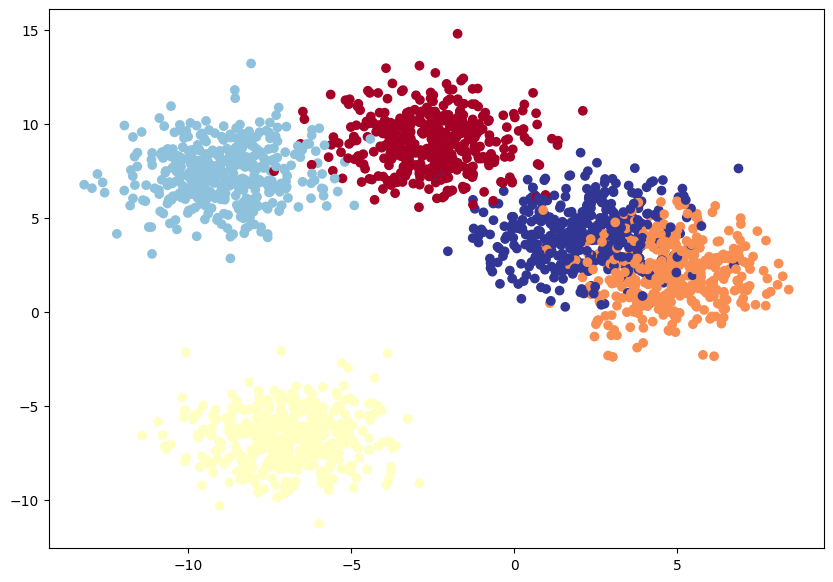

In [27]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 5
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=2000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [28]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [29]:
from torch import nn

class Multiclassmodel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_features),
    )
  def forward(self,x):
    return self.linear_layer_stack(x)



In [30]:
model=Multiclassmodel(input_features=NUM_FEATURES,output_features=NUM_CLASSES,hidden_units=8)

In [31]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

In [32]:
model

Multiclassmodel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=5, bias=True)
  )
)

In [33]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [34]:
torch.manual_seed(42)

epochs=1000
for epoch in range(epochs):
  model.train()
  y_logits=model(X_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_logits=model(X_test)
    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.24220, Acc: 51.88% | Test Loss: 0.88223, Test Acc: 66.75%
Epoch: 1 | Loss: 0.86322, Acc: 65.25% | Test Loss: 0.74401, Test Acc: 89.25%
Epoch: 2 | Loss: 0.71005, Acc: 91.00% | Test Loss: 0.65851, Test Acc: 87.25%
Epoch: 3 | Loss: 0.61911, Acc: 90.56% | Test Loss: 0.59817, Test Acc: 84.75%
Epoch: 4 | Loss: 0.55750, Acc: 89.94% | Test Loss: 0.55197, Test Acc: 86.25%
Epoch: 5 | Loss: 0.51168, Acc: 90.19% | Test Loss: 0.51491, Test Acc: 87.25%
Epoch: 6 | Loss: 0.47554, Acc: 90.56% | Test Loss: 0.48429, Test Acc: 88.25%
Epoch: 7 | Loss: 0.44596, Acc: 91.19% | Test Loss: 0.45845, Test Acc: 89.00%
Epoch: 8 | Loss: 0.42112, Acc: 91.38% | Test Loss: 0.43629, Test Acc: 89.25%
Epoch: 9 | Loss: 0.39989, Acc: 91.56% | Test Loss: 0.41704, Test Acc: 89.50%
Epoch: 10 | Loss: 0.38150, Acc: 91.50% | Test Loss: 0.40017, Test Acc: 89.50%
Epoch: 11 | Loss: 0.36541, Acc: 91.56% | Test Loss: 0.38527, Test Acc: 91.00%
Epoch: 12 | Loss: 0.35120, Acc: 91.75% | Test Loss: 0.37203, Test Acc: 91.

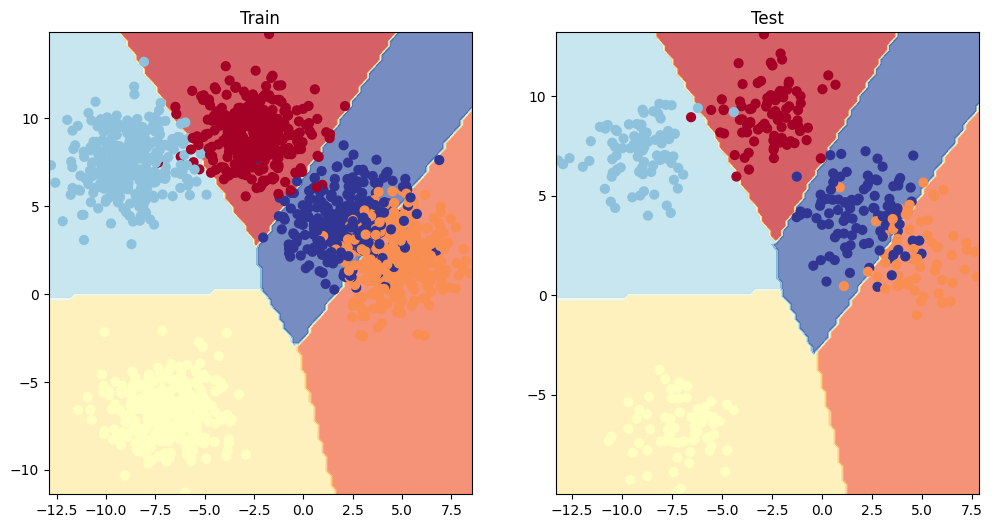

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

Model-2: with activation functions


In [83]:
from torch import nn

class Multiclassmodel2(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
         nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features),
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

In [84]:
model1=Multiclassmodel2(input_features=NUM_FEATURES,output_features=NUM_CLASSES,hidden_units=8)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)
model1

Multiclassmodel2(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=5, bias=True)
  )
)

In [85]:
torch.manual_seed(42)

epochs=1000
for epoch in range(epochs):
  model1.train()
  y_logits=model1(X_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model1.eval()
  with torch.inference_mode():
    test_logits=model1(X_test)
    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 1 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 2 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 3 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 4 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 5 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 6 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 7 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 8 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 9 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 10 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 11 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.50%
Epoch: 12 | Loss: 1.49172, Acc: 18.88% | Test Loss: 1.44907, Test Acc: 24.

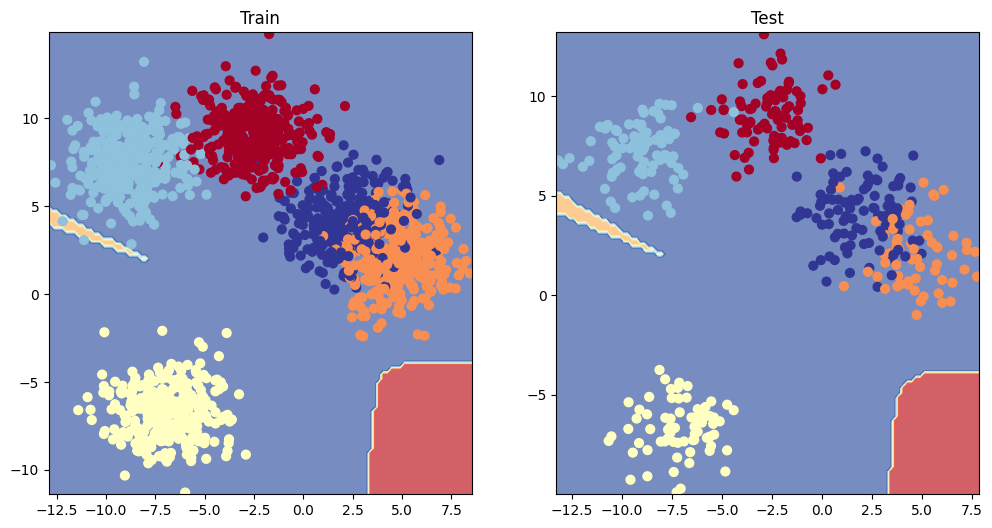

In [86]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)